In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 38A6-1C25

 Directory of C:\Users\Administrator\Documents\data science

17-02-2023  10:31    <DIR>          .
23-01-2023  15:47    <DIR>          ..
17-02-2023  10:31    <DIR>          .ipynb_checkpoints
06-02-2023  19:59           103,983 BEML.csv
06-02-2023  19:59           107,633 GLAXO.csv
30-01-2023  09:40             3,858 iris.csv
17-02-2023  10:30                72 machine learning.ipynb
13-02-2023  23:10            37,743 practice.ipynb
16-02-2023  22:38             6,473 python basic practice.ipynb
15-02-2023  10:50           344,722 python class.ipynb
17-02-2023  10:30             1,172 wc-at.csv
               8 File(s)        605,656 bytes
               3 Dir(s)  46,421,966,848 bytes free


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# read

In [2]:
data= pd.read_csv("wc-at.csv")

In [4]:
data

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


# plotting

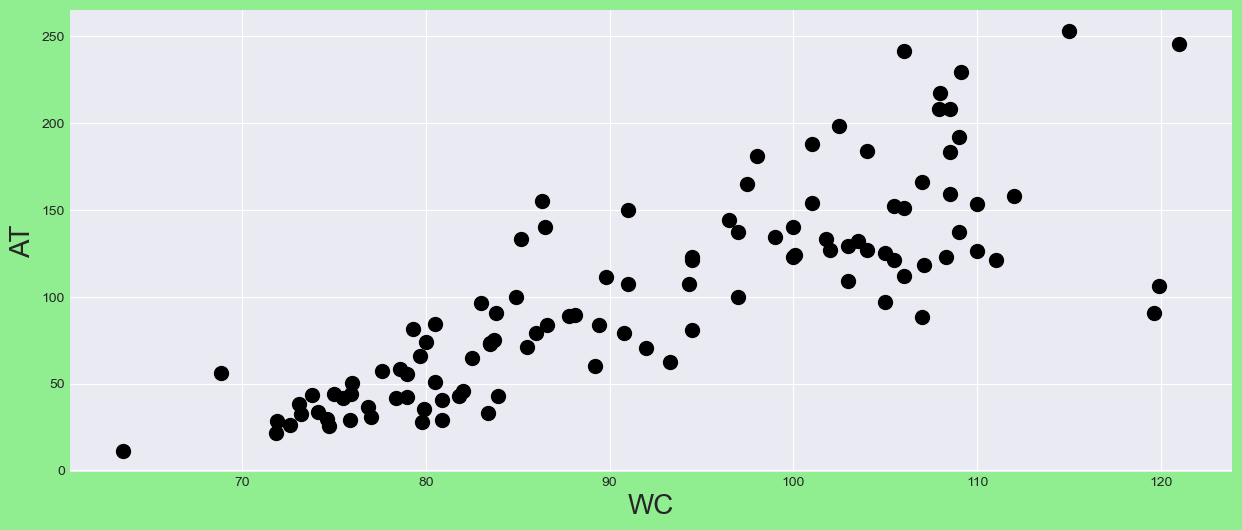

In [6]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.style.use("seaborn-darkgrid")
plt.scatter(data.Waist,data.AT,s=100,color="black")
plt.xlabel("WC",size=20)
plt.ylabel("AT",size=20)
plt.show()


#data.plot(kind="scatter",x="YearsExperience",y="Salary")
#plt.show()

# Model

In [6]:
model=LinearRegression()
model.fit(data[["Waist"]],data["AT"])       #model is ready

LinearRegression()

In [7]:
pred=model.predict(data[["Waist"]])   #predicting the model.. Here as y=mx+c we should only give x variable(waist)

In [8]:
pred

array([ 42.56825159,  35.1317039 ,  66.95321031,  74.389758  ,
        42.22236565,  32.53755936,  63.84023685,  72.48738533,
         3.65608343,  37.20701954,  32.71050233,  43.43296644,
        36.8611336 ,  57.26840401,  50.35068522,  22.16098118,
        46.71888286,  40.49293596,  39.28233517,  46.54593989,
        49.83185632,  63.84023685,  60.38137746,  92.54876981,
        67.64498219, 102.23357611,  83.55573539,  62.4566931 ,
        81.48041975,  69.37441188,  72.83327127,  88.74402448,
        98.08294484,  93.24054169, 136.82217003, 110.88072459,
        98.77471671, 140.28102942,  60.7272634 ,  57.26840401,
        72.83327127,  46.89182583,  62.4566931 ,  83.20984945,
        71.10384158, 154.46235293, 110.18895271, 110.88072459,
        59.68960558,  58.30606183,  94.62408544,  73.87092909,
        78.71333224,  45.16239614,  55.19308837,  55.88486025,
        87.70636666,  82.51807757,  79.75099006,  73.52504315,
        52.42600086,  77.67567442,  60.03549152, 158.61

# model is ready now plot y and yhat

In [9]:
model.coef_       # m is coefficient

array([3.45885939])

In [10]:
model.intercept_     #c is intercept

-215.98148796164247

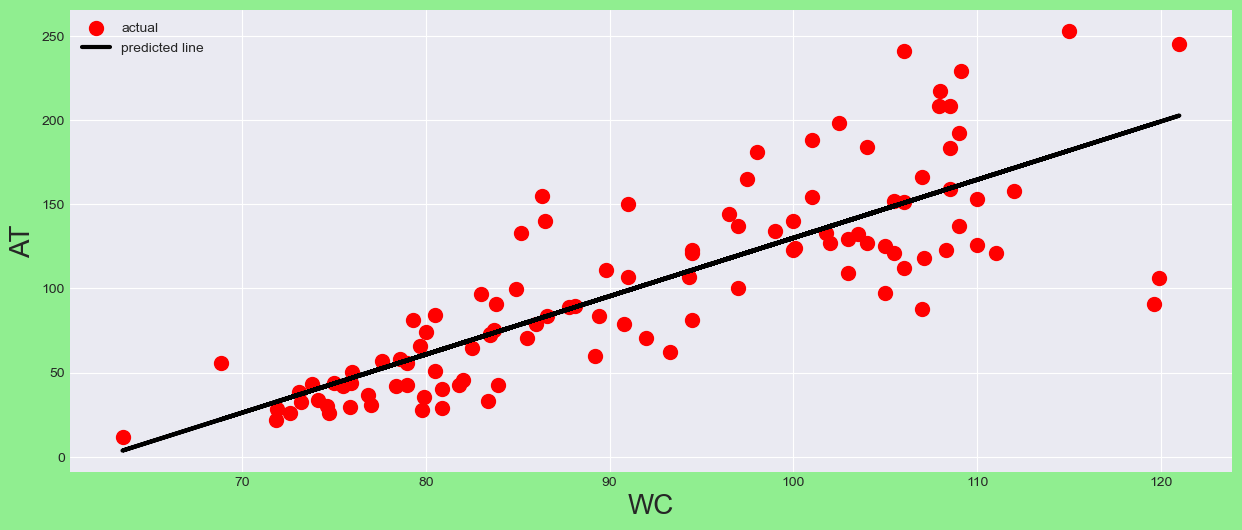

In [17]:
plt.figure(figsize=(15,6),facecolor="lightgreen")
plt.style.use("seaborn-darkgrid")
plt.scatter(data.Waist,data.AT,s=100,color="red",label="actual")
plt.plot(data.Waist,pred,linewidth=3,linestyle="-",color="black",label="predicted line")
plt.legend(loc="best")
plt.xlabel("WC",size=20)
plt.ylabel("AT",size=20)
plt.show()

# Evaluation

In [18]:
r2_score(data["AT"],pred)

0.6700368930528429

# Stats model

In [10]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

In [11]:
data=pd.read_csv("wc-at.csv")

In [12]:
data.head(2)

,Waist,AT
0,74.75,25.72
1,72.60,25.89


In [13]:
model=smf.ols("AT~Waist",data=data).fit() #ols=ordinary least square(least error) 

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.62e-27
Time:                        09:38:22   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
'''
AT=m*Waist+c
AT=m*log(Waist)+c
AT=m*exp(Waist)+c
log(AT)=m*Waist+c
log(AT)=m1*Waist+m2*Waist^2+c
'''

model=smf.ols("AT~np.log(Waist)",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           6.80e-28
Time:                        09:38:23   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model=smf.ols("np.log(AT)~Waist+pow(Waist,2)",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 20 Feb 2023   Prob (F-statistic):           1.80e-35
Time:                        09:57:14   Log-Likelihood:                -24.779
No. Observations:                 109   AIC:                             55.56
Df Residuals:                     106   BIC:                             63.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -7.8241      1.473     -5.312      0.000     -10.744      -4.904
Waist             0.2289      0.032      7.107      0.000       0.165       0.293
pow(Waist, 2)    -0.0010      0.000     -5.871      0.000      -0.001      -0.001
==============================================================================
Omnibus:                        0.325   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.271
Skew:                           0.119   Prob(JB):                        0.873
Kurtosis:                       2.949   Cond. No.                     4.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 38A6-1C25

 Directory of C:\Users\Administrator\Documents\data science

23-02-2023  10:24    <DIR>          .
23-01-2023  15:47    <DIR>          ..
17-02-2023  10:31    <DIR>          .ipynb_checkpoints
06-02-2023  19:59           103,983 BEML.csv
23-02-2023  10:21             3,527 Cars.csv
06-02-2023  19:59           107,633 GLAXO.csv
30-01-2023  09:40             3,858 iris.csv
22-02-2023  19:50           135,496 machine learning.ipynb
23-02-2023  10:22           490,567 Multi Linear Regression-updated .ipynb
22-02-2023  21:20           122,846 practice.ipynb
19-02-2023  18:12             7,366 python basic practice.ipynb
20-02-2023  14:46           346,129 python class.ipynb
17-02-2023  10:30             1,172 wc-at.csv
              10 File(s)      1,322,577 bytes
               3 Dir(s)  46,487,236,608 bytes free
